In [81]:
import rebound 

import sympy as sp
from matplotlib import pyplot as plt
from matplotlib import pyplot

import numpy as np

from sympy import init_printing
init_printing()

%matplotlib inline
from sympy import *

import math

# Predicting an Astrometric signal

## Calculating velocity of the star

Proper motion and distance are given

In [82]:
proper_motion_mas_yr = 50
proper_motion_as_yr = proper_motion_mas_yr * 0.001
print('The proper motion is:',proper_motion_as_yr,'as/year ')

D = 50
print('The distance to the star is',D,'pc')

The proper motion is: 0.05 as/year 
The distance to the star is 50 pc


Use the equation $v_T=4.74D\mu$

In [83]:
v_star_kms = 4.74*proper_motion_as_yr*D
v_star_AUyear = v_star_kms * (1/1.496e+8) * (3.154e+7)
print('The velocity of the star is',v_star_kms,'km/s or',v_star_AUyear,'AU/years')

The velocity of the star is 11.850000000000001 km/s or 2.4983221925133696 AU/years


Setting the timescale as 4.2 years 

In [84]:
timescale = 4.2

## Simulation WITHOUT planet 

Creating a simulation with units of AU, M$_\odot$ and years where the central object is the Sun and the other objects are the Earth and a star

In [336]:
sim = rebound.Simulation()                                # starting simulation named sim 

sim.units=["msun","AU","year"]                            # setting units of sim 

sim.add(m=1)                                              # add the Sun as the central object 

sim.add(m=3.0027e-6, a=1, e=0)                            # add Earth in a 1 AU circular orbit 

sim.add(x = 1.031e7, vy = v_star_AUyear)                  # add a hypothetical star 50 pc away with calculated velocity 

Creating arrays to hold data 

In [337]:
n=500

# positions of sun, earth, star and sun-earth COM
pos_sun = np.zeros((n,3))
pos_earth = np.zeros((n,3))
pos_star = np.zeros((n,3))
sun_earth_com = np.zeros((n,3))

# r_star - r_earth vector
r_SE = np.zeros((n,3))

# length of r_star - r_earth vector in x-y and x-y-z plane 
r_SE_xy = np.zeros((n,1))
r_SE_xyz = np.zeros((n,1))

# right ascension and declination
alpha = np.empty((n,1))
delta = np.empty((n,1))

times = np.linspace(0,timescale,num=n)

Creating a for loop to fill the arrays that were created

In [338]:
for i,t in enumerate(times):
    sim.integrate(t)
    
    # positions of sun, earth and star
    pos_sun[i] = sim.particles[0].xyz
    pos_earth[i] = sim.particles[1].xyz
    pos_star[i] = sim.particles[2].xyz
    
    # center of mass of sun and earth 
    com = sim.calculate_com(last=2)
    sun_earth_com[i] = com.xyz
    
    # r_star - r_earth vector 
    r_SE[i] = pos_star[i] - pos_earth[i]
    
    #length of r_star - r_earth vector in x-y and x-y-z plane
    r_SE_xy[i] = np.sqrt(r_SE[i,0]**2 + r_SE[i,1]**2)
    r_SE_xyz[i] = np.sqrt(r_SE[i,0]**2 + r_SE[i,1]**2 + r_SE[i,2]**2)
    
    # calculating RA and Dec
    alpha[i] = (np.arctan(r_SE[i,1]/r_SE[i,0]))*1e6
    delta[i] = (np.arccos(r_SE_xy[i]/r_SE_xyz[i]))*1e6

Creating a plot for the positions of the Sun and Earth

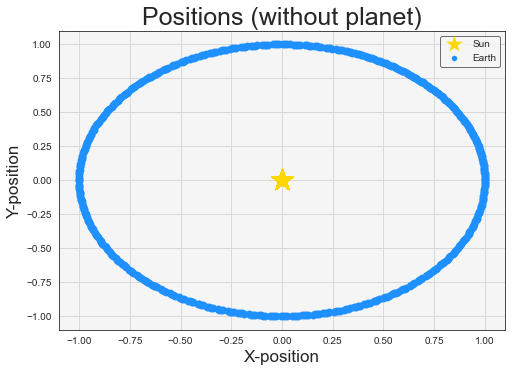

In [339]:
plt.clf() 

#plt.rcParams['figure.figsize'] = [15/2, 15/2]   

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting data 
plt.scatter(pos_sun[:,0], pos_sun[:,1], color='gold', label='Sun', s=550,marker='*') 
plt.scatter(pos_earth[:,0], pos_earth[:,1], color='dodgerblue', label='Earth', s=55) 
#plt.scatter(sun_earth_com[:,0], sun_earth_com[:,1], color='hotpink', label='Earth-Sun COM', s=55) 

# setting titles
plt.title('Positions (without planet)',fontsize = 25)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plotting legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=0.7)
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
       
plt.show()  

Creating a plot of the position of the star

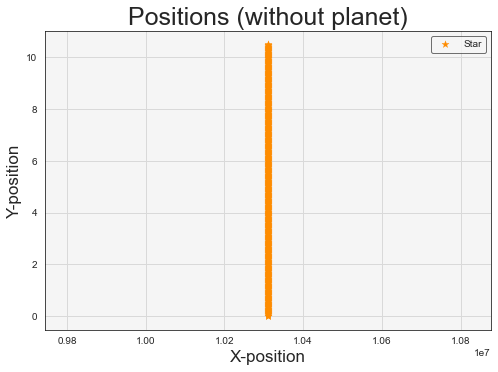

In [340]:
plt.clf() 

#plt.rcParams['figure.figsize'] = [15/2, 15/2]   

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting data 
plt.scatter(pos_star[:,0], pos_star[:,1] , color='darkorange', label='Star', s=55, marker='*') 

# setting titles
plt.title('Positions (without planet)',fontsize = 25)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plotting legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1)
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
       
plt.show()  

## Simulation WITH planet

Creating a simulation with units of AU, M$_\odot$ and years where the central object is the Sun and the other objects are the Earth and a star with a planet orbiting it

In [349]:
sim_wp = rebound.Simulation()                                                # create a simulation called sim_wp 

sim_wp.units=["msun","AU","year"]                                            # setting the units for sim_wpm

sim_wp.add(m=1)                                                              # add Sun as the central object 

sim_wp.add(m=3.0027e-6, a=1, e=0)                                            # add Earth in a 1 AU circular orbit 

sim_wp.add(m = 1, x = 1.031e7, vy=v_star_AUyear)                                    # add a hypothetical star 50 pc away with calculated velocity

sim_wp.add(m = 0.00477294, a = 0.6, e = 0.2, primary = sim_wp.particles[2])  # add planet from figure 3.1 caption and have it orbit the star 

Creating arrays to hold data 

In [350]:
# positions of sun, earth, star and sun-earth COM
pos_sun_wp = np.zeros((n,3))
pos_earth_wp = np.zeros((n,3))
pos_star_wp = np.zeros((n,3))
sun_earth_com_wp = np.zeros((n,3))

# r_star - r_earth vector
r_SE_wp = np.zeros((n,3))

# length of r_star - r_earth vector in x-y and x-y-z plane 
r_SE_xy_wp = np.zeros((n,1))
r_SE_xyz_wp = np.zeros((n,1))

# right ascension and declination
alpha_wp = np.empty((n,1))
delta_wp = np.empty((n,1))

Filling arrays with data using a for loop

In [351]:
for j,t in enumerate(times):
    sim_wp.integrate(t)
    
    # positions of sun, earth and star
    pos_sun_wp[j] = sim_wp.particles[0].xyz
    pos_earth_wp[j] = sim_wp.particles[1].xyz
    pos_star_wp[j] = sim_wp.particles[2].xyz
    
    # center of mass of sun and earth 
    com_wp = sim_wp.calculate_com(last=2)
    sun_earth_com_wp[j] = com_wp.xyz
    
    # r_star - r_earth vector 
    r_SE_wp[j] = pos_star_wp[j] - pos_earth_wp[j]
    
    #length of r_star - r_earth vector in x-y and x-y-z plane
    r_SE_xy_wp[j] = np.sqrt(r_SE_wp[j,0]**2 + r_SE_wp[j,1]**2)
    r_SE_xyz_wp[j] = np.sqrt(r_SE_wp[j,0]**2 + r_SE_wp[j,1]**2 + r_SE_wp[i,2]**2)
    
    # calculating RA and Dec
    alpha_wp[j] = (np.arctan(r_SE_wp[j,1]/r_SE_wp[j,0]))*1e6
    delta_wp[j] = (np.arccos(r_SE_xy_wp[j]/r_SE_xyz_wp[j]))*1e6

Creating a plot for the positions of the sun and earth

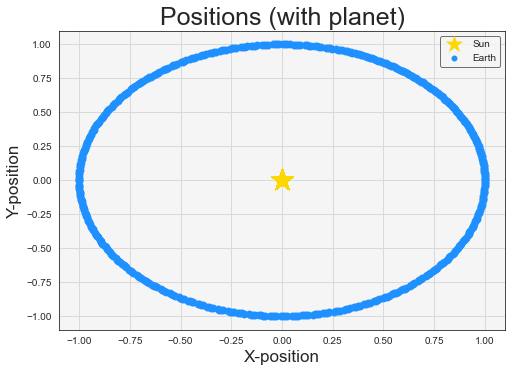

In [352]:
plt.clf() 

#plt.rcParams['figure.figsize'] = [15/2, 15/2]   

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting data 
plt.scatter(pos_sun_wp[:,0], pos_sun_wp[:,1], color='gold', label='Sun', s=550,marker='*') 
plt.scatter(pos_earth_wp[:,0], pos_earth_wp[:,1], color='dodgerblue', label='Earth', s=55) 
#plt.scatter(sun_earth_com_wp[:,0], sun_earth_com_wp[:,1], color='hotpink', label='Sun-Earth COM', s=55) 


# creating titles 
plt.title('Positions (with planet)',fontsize = 25)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# creating legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=0.75)
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
         
plt.show() 

Creating a plot for the positions of the star and planet

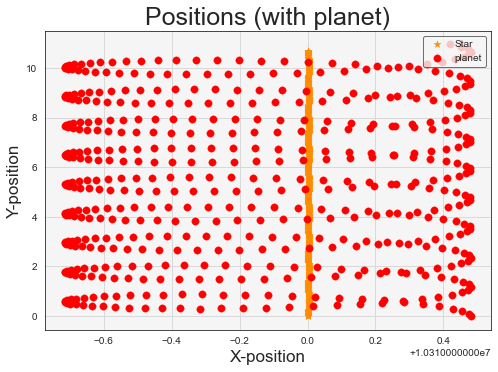

In [353]:
plt.clf() 

#plt.rcParams['figure.figsize'] = [15/2, 15/2]   

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting data 
plt.scatter(pos_star_wp[:,0], pos_star_wp[:,1], color='darkorange', label='Star', s=55, marker='*') 
plt.scatter(pos_planet_wp[:,0], pos_planet_wp[:,1], color='red', s=55, label='planet') 

# creating titles 
plt.title('Positions (with planet)',fontsize = 25)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# creating legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1)
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
         
plt.show() 

## Comparing astrometric signals

Creating a plot for the astrometric signals of the simulation with and without the planets to look at their simularities/differences 

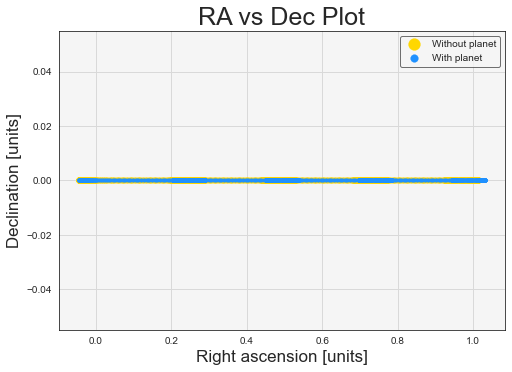

In [380]:
plt.clf() 

#plt.rcParams['figure.figsize'] = [15/2, 15/2]   

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot data 
plt.scatter(alpha, delta, color='gold', label='Without planet', s=35) 
plt.scatter(alpha_wp, delta_wp, color='dodgerblue', label='With planet', s=15) 

# set titles 
plt.title('RA vs Dec Plot',fontsize = 25)             
plt.xlabel('Right ascension [units]',fontsize = 17)                     
plt.ylabel('Declination [units]',fontsize = 17)

# plot legend
legend=plt.legend(loc="upper right",frameon=True, markerscale = 2)
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

# setting x and y limits 
#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.30e15,0.30e15])
       
plt.show() 

## Reproducing astrometric signal using equations 3.22 and 3.23

Setting variables (random for now)

In [362]:
planets = ['Earth', 'Planet from Figure 3.1']

a = [1,  0.6]           # semi-major axis in units of AU
omega = [2,2]           # argument of perihelion
OMEGA = [2,2]           # longitude of the ascending node 
i = [1.160644,2]         # orbital inclination (rad)

e = [0.0167,0.2]        # ellipticity of the orbit 
E = [2,2]               #eccentricity anomaly 

prop_RA = [1,2]         # proper motion in RA direction
prop_DEC = [1,2]        # proper motion in DEC direction 

# cartesian components of the observer position wrt the solar system barycentre
rx = [1,2]
ry = [2,2] 
rz = [3,2] 

alpha1 = [1,2]
delta1 = [1,2]

parallax = [1,2] 
change_RA = [1,2]
change_DEC = [1,2] 

t1 = 4.2 
t0 = 0

Using a loop to calculate and print the values 

In [364]:
N = len(planets)
print('The number of planets is:',N)
    
k = 0
for k in range(N):
    print('The planet we are calculating for is :', planets[k])
    
    A = a[k]*(math.cos(omega[k])*math.cos(OMEGA[k])-math.sin(omega[k])*math.sin(OMEGA[k])*math.cos(i[k]))
    print('A =',A)
    
    B = a[k]*(math.cos(omega[k])*math.sin(OMEGA[k])+math.sin(omega[k])*math.cos(OMEGA[k])*math.cos(i[k]))
    print('B =',B)
    
    F = a[k]*(-math.sin(omega[k])*math.cos(OMEGA[k])-math.cos(omega[k])*math.sin(OMEGA[k])*math.cos(i[k]))
    print('F =',F)
    
    G = a[k]*(-math.sin(omega[k])*math.sin(OMEGA[k])+math.cos(omega[k])*math.cos(OMEGA[k])*math.cos(i[k]))
    print('G =',G)
    
    X = math.cos(E[k])-e[k]
    print('X =',X)
    
    Y = sqrt(1-e[k]**2)*math.sin(E[k])
    print('Y = ', Y)
    
    PI_RA = rx[k]*math.sin(alpha1[k]) - ry[k]*math.cos(alpha1[k])
    print('PI_RA =',PI_RA)
    
    PI_DEC = (rx[k]*math.cos(alpha1[k])+ry[k]*math.sin(alpha1[k]))*math.sin(delta1[k]) - rz[k]*math.cos(delta1[k])
    print('PI_DEC =',PI_DEC)
    
    three22 = (B*X+G*Y)+change_RA[k]*math.cos(delta1[k])+parallax[k]*PI_RA+prop_RA[k]*(t-t0)
    print('3.22 =',three22)
    
    three23 = ((A*X)+(F*Y))+change_DEC[k] + parallax[k]*PI_DEC + prop_DEC[k]*(t-t0)
    print('3.23 =',three23)

The number of planets is: 2
The planet we are calculating for is : Earth
A = -0.1565162015497247
B = -0.5292883763792944
F = 0.5292883763792944
G = -0.7577671761149258
X = -0.4328468365471424
Y =  0.909170621004163
PI_RA = -0.23913362692838303
PI_DEC = 0.24988863235556402
3.22 = 4.04132982419173
3.23 = 5.99884961690779
The planet we are calculating for is : Planet from Figure 3.1
A = 0.3103544822205427
B = -0.1325584592983651
F = 0.1325584592983651
G = -0.5393336197077429
X = -0.6161468365471424
Y =  0.890925888059458
PI_RA = 2.650888526745648
PI_DEC = 1.7291347986499686
3.22 = 12.4706525716528
3.23 = 13.7851454279417
